In [202]:
import cvxpy as cp
import numpy as np
import scipy.io
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Comparison of optimization programming : Quadratic, Conic, Semi Definite programming

In [2]:
mat = scipy.io.loadmat('Data.mat')
data = mat['Data']

In [16]:
def Solver(x,A,b,objective,constraint):
  
    if(constraint!=None):
        constraints = [A @ x[1:] == b, x>=0]  # Linear constraint
        constraints = constraints+constraint    # Additional constraint
    else:
        constraints = [A @ x == b, x>=0]  # Linear constraint
    
    problem = cp.Problem(objective, constraints) # Define the problem

    init =time.time()
    problem.solve(solver=cp.CLARABEL) # Solve the problem
    final = time.time()
    
    print('Size of problem : ', problem.size_metrics.num_scalar_data)
    print('Solver used : ',problem.solver_stats.solver_name) 
    print("Is the solution optimal : ", problem.status)   
    print('Time required by solver to setup the problem :',problem.solver_stats.setup_time,'s')
    print('Number of iterations :',problem.solver_stats.num_iters)
    print('Time required by solver to solve the problem :',problem.solver_stats.solve_time,'s')
    print("Optimal cost :", problem.value)
    #print("Optimal x:", x.value,'\n')

The optimization problem is formulated as quadratic, second order cone and semidefinite programming

QP : 
$$
\begin{aligned}
\text{minimize} \quad & x^TIx \\
\text{subject to} \quad & A x = b, \\
                        & x \geq 0, \\
                        & x \in \mathbb{R}^n
\end{aligned}
$$

SOCP : 
$$
\begin{aligned}
\text{minimize} \quad & y \\
\text{subject to} \quad & A x = b, \\
                        & x \geq 0, \\
                        & \|x\|_2 \leq y \\
                        & x \in \mathbb{R}^n
\end{aligned}
$$

SDP : 
$$
\begin{aligned}
\text{minimize} \quad & y \\
\text{subject to} \quad & A x = b, \\
                        & x \geq 0, \\
                        & \begin{bmatrix}
y & \mathbf{x}^T \\
\mathbf{x} & yI_n \\
\end{bmatrix} \succeq 0 \\
& x \in \mathbb{R}^n
\end{aligned}
$$

In [ ]:
def QP(A):
    n = A.shape[1]
    x = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(x,np.eye(n))) # x^TQx
    
    return x,objective

def SDP(A):
    n = A.shape[1]
    x = cp.Variable(n+1)
    objective = cp.Minimize(x[0])

    top_left = cp.reshape(x[0], (1,1), order='C')
    top_right = cp.reshape(x[1:], (1,n), order='C')
    bottom_left = cp.reshape(x[1:], (n,1), order='C')
    bottom_right = x[0]*np.eye(n)

    T = cp.bmat([[top_left, top_right],
                [bottom_left, bottom_right]])
    
    constraint = [T>>0]
    return x,objective, constraint

def SOCP(A):
    n = A.shape[1]
    x = cp.Variable(n+1)
    objective = cp.Minimize(x[0])
    constraint = [cp.norm(x[1:])<=x[0]]
    return x,objective, constraint

In [17]:
print('Quadratic Programming','\n')
n = data.shape[0]
for i in range(n):
    content = data[i][0][0][0]
    A = content[0]
    b = content[1].flatten()
    print('Norm minimization problem',i+1,'\n')
    init = time.time()
    x,obj = QP(A)
    Solver(x,A,b,obj,None)
    final = time.time()
    print('Total time required',final-init,'\n')  

Quadratic Programming 

Norm minimization problem 1 

Size of problem :  1366
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 6
Time required by solver to solve the problem : 0.000628816 s
Optimal cost : 9.712549591537982
Total time required 0.018579959869384766 

Norm minimization problem 2 

Size of problem :  15051
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 5
Time required by solver to solve the problem : 0.005249489 s
Optimal cost : 31.23780074684081
Total time required 0.023718833923339844 

Norm minimization problem 3 

Size of problem :  60101
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 7
Time required by solver to solve the problem : 0.034825892 s
Optimal cost : 54.137622034071924
Total time required 0.0620939

In [18]:
print('Second Order Conic Programming','\n')
n = data.shape[0]
for i in range(n):
    content = data[i][0][0][0]
    A = content[0]
    b = content[1].flatten()
    print('Norm minimization problem',i+1,'\n')
    init = time.time()
    x,obj,const = SOCP(A)
    Solver(x,A,b,obj,const)
    final = time.time()
    print('Total time required',final-init,'\n')

Second Order Conic Programming 

Norm minimization problem 1 

Size of problem :  466
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 8
Time required by solver to solve the problem : 0.001039079 s
Optimal cost : 3.116496347745446
Total time required 0.04767107963562012 

Norm minimization problem 2 

Size of problem :  5051
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 8
Time required by solver to solve the problem : 0.009191959 s
Optimal cost : 5.58907870397699
Total time required 0.02574610710144043 

Norm minimization problem 3 

Size of problem :  20101
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 9
Time required by solver to solve the problem : 0.045731383 s
Optimal cost : 7.357827211977836
Total time required 0.0717

In [19]:
print('Semidefinite Programming','\n')
n = data.shape[0]
for i in range(n):
    content = data[i][0][0][0]
    A = content[0]
    b = content[1].flatten()
    print('Norm minimization problem',i+1,'\n')
    init = time.time()
    x,obj,const = SDP(A)
    Solver(x,A,b,obj,const)
    final = time.time()
    print('Total time required',final-init,'\n')

Semidefinite Programming 

Norm minimization problem 1 

Size of problem :  1367
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 8
Time required by solver to solve the problem : 0.011128084 s
Optimal cost : 3.116497282296087
Total time required 0.03880643844604492 

Norm minimization problem 2 

Size of problem :  15052
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 10
Time required by solver to solve the problem : 0.261850005 s
Optimal cost : 5.589079232696565
Total time required 0.29308056831359863 

Norm minimization problem 3 

Size of problem :  60102
Solver used :  CLARABEL
Is the solution optimal :  optimal
Time required by solver to setup the problem : None s
Number of iterations : 12
Time required by solver to solve the problem : 2.330521344 s
Optimal cost : 7.357835071015136
Total time required 2.39022

# Positive Semidefinite Matrix domain in 2D and 3D

This is done to plot the domain of positive semidefinite matrix in 2D and 3D
$$
\begin{aligned}
\text{minimize} \quad & \langle C, X \rangle \\
\text{subject to} \quad & X_{ii} = 1, \quad i = 1, \dots, n \\
                        & X \in \mathbb{S}_+^n
\end{aligned}
$$

2D

In [217]:
# Create grid for 2 off-diagonal elements
x = np.linspace(-5, 5, 500)

feasible_points = []

for i in range(len(x)):
    # Create symmetric matrix
    matrix = np.array([[1, x[i]],
                        [x[i], 1]])
    
    # Check if positive semidefinite
    if np.all(np.linalg.eigvals(matrix) >= -1e-10):
        feasible_points.append(x[i])

feasible_points = np.array(feasible_points)


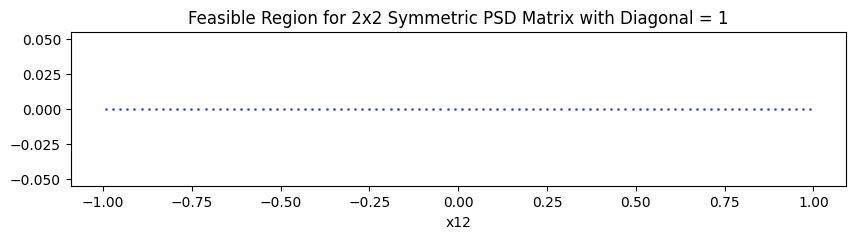

In [219]:
# 1D Plot
fig = plt.figure(figsize=(10,2))
plt.scatter(feasible_points, 0*feasible_points, c='b', alpha=0.6, s=1)
plt.xlabel('x12')
plt.title('Feasible Region for 2x2 Symmetric PSD Matrix with Diagonal = 1')
plt.show()

3D 

In [207]:
# Create grid for 3 off-diagonal elements
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z)

feasible_points = []

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            # Create symmetric matrix
            matrix = np.array([[1, X[i,j,k], Y[i,j,k]],
                             [X[i,j,k], 1, Z[i,j,k]],
                             [Y[i,j,k], Z[i,j,k], 1]])
            
            # Check if positive semidefinite
            if np.all(np.linalg.eigvals(matrix) >= -1e-10):
                feasible_points.append([X[i,j,k], Y[i,j,k], Z[i,j,k]])

feasible_points = np.array(feasible_points)


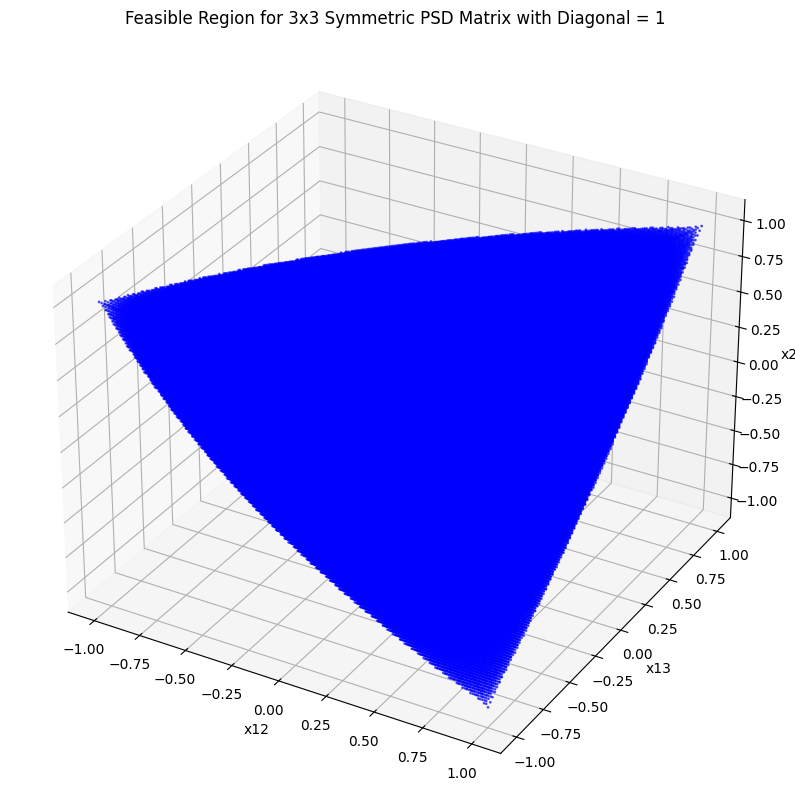

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feasible_points[:,0], feasible_points[:,1], feasible_points[:,2], 
          c='b', alpha=0.6, s=1)
ax.set_xlabel('x12')
ax.set_ylabel('x13')
ax.set_zlabel('x23')
ax.set_title('Feasible Region for 3x3 Symmetric PSD Matrix with Diagonal = 1')
plt.show()